# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings

import warnings 
warnings.filterwarnings("ignore")

In [4]:
# Import the libraries you will be using for analysis

# !pip install numpy==1.26.4
# !pip install pandas==2.2.2
# !pip install matplotlib==3.10.0
# !pip install seaborn==0.13.2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [28]:
# Try loading one file

df1 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-1.parquet')
df1.info()
## Index: 3041714 entries, 0 to 3066765

df2 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-2.parquet')
df2.info()
## Index: Index: 3374086 entries, 0 to 3403765

df3 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-3.parquet')
df3.info()
## Index: 3275796 entries, 0 to 3307233

df4 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-4.parquet')
df4.info()
## Index: 2792901 entries, 0 to 2824208

df5 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-5.parquet')
df5.info()
## Index: 2889185 entries, 0 to 2913954

df6 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-6.parquet')
df6.info()
## Index: 3258261 entries, 0 to 3288249

df7 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-7.parquet')
df7.info()
## Index: 3481547 entries, 0 to 3513648

df8 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-8.parquet')
df8.info()
## Index: 2875947 entries, 0 to 2907107

df9 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-9.parquet')
df9.info()
## Index: 2817156 entries, 0 to 2846721

df10 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-10.parquet')
df10.info()
## Index: 3485185 entries, 0 to 3522284

df11 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-11.parquet')
df11.info()
## Index: 3302857 entries, 0 to 3339714

df12 = pd.read_parquet('../Datasets and Dictionary/trip_records/2023-12.parquet')
df12.info()
## Index: 3333925 entries, 0 to 3376566


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [46]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
# Make sure 'tpep_pickup_datetime' is in datetime format

dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Loop through each DataFrame (for each month)
for idx, df in enumerate(dfs, start=1):
    print(f"Processing DataFrame {idx}")
    
    # 'tpep_pickup_datetime' is a datetime column
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

    # Extract date and hour from 'tpep_pickup_datetime'
    df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
    df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

    # Loop through each unique date in the dataset
    for date in df['pickup_date'].unique():
        # Filter data for the date
        day_data = df[df['pickup_date'] == date]

        # Loop through each hour
        for hour in range(24):
            # Filter data for the current hour of the day
            hour_data = day_data[day_data['pickup_hour'] == hour]

            # Sample 5% of the data for the current hour
            sample = hour_data.sample(frac=0.05, random_state=42)

            # Append the sampled data to the final DataFrame
            sampled_data = pd.concat([sampled_data, sample])

# Reset the index for the final sampled data
sampled_data = sampled_data.reset_index(drop=True)

# Display the sampled data
print(sampled_data.head())

# Information about the sampled data
sampled_data.info()


Processing DataFrame 1
Processing DataFrame 2
Processing DataFrame 3
Processing DataFrame 4
Processing DataFrame 5
Processing DataFrame 6
Processing DataFrame 7
Processing DataFrame 8
Processing DataFrame 9
Processing DataFrame 10
Processing DataFrame 11
Processing DataFrame 12
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0     

In [47]:
# Store the df in csv/parquet
# df.to_parquet('')

sampled_data.to_parquet('sampled_data.parquet', index=False)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [6]:
# Load the new data file

df = pd.read_parquet('sampled_data.parquet')

In [7]:
# df.head()
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   pickup_date  pickup_hour Airport_fee  
0   2023-01-01            0         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [8]:
# df.info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [9]:
# Fix the index and drop any columns that are not needed

# Reset the index for the final sampled data
df = df.reset_index(drop=True)

df.drop(['store_and_fwd_flag'], axis=1, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [10]:
# Combine the two airport fee columns

df['final_airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])
df.drop(['Airport_fee', 'airport_fee'], axis=1, inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_date            object        
 18  pickup_hour           

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [12]:
# check where values of fare amount are negative
df[df['fare_amount'] < 0]


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_date, pickup_hour, final_airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [13]:
# Analyse RatecodeID for the negative fare amounts

# Observation: There are no negative value for fare amount.And hence do not see any difference in RatecodeID.

In [14]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include=["number"])
negative_columns = numeric_df.columns[(numeric_df < 0).any()].tolist()
print("Columns with negative values:", negative_columns)

# df[df['extra'] < 0]
# df[df['mta_tax'] < 0 ] 
# df[df['improvement_surcharge'] < 0]
# df[df['total_amount'] < 0]
# df[df['congestion_surcharge'] < 0]

# Observations: 1. extra has negative value where fare_amount is zero and PULocationID and DOLocationID are same. These could be the case of cancelled trips or system error.rate Code ID is 1 and VendorID is 2.
# 2. mta_tax has negative value with 73 rows where fare_amount is zero
# 3. improvement_surcharge has negative value for 78 rows with fare_amount as zero.
# 4. total_amount has negative value for 78 rows with fare_amount as zero.
# 5. congestion_surcharge has negative values for 76 rows with fare_amount as zero.
# Overall for demand analysis we would need these rows, since they reflect demand pattern.
# I am making all negative values to 0 but marking them as invalid_fare to track negative values.

monetary_columns = ["extra", "mta_tax", "improvement_surcharge", "total_amount", "congestion_surcharge", "final_airport_fee"]

df["invalid_fare"] = df[monetary_columns].lt(0).any(axis=1).astype(int)
df["invalid_fare"].value_counts()


Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'final_airport_fee']


invalid_fare
0    1896321
1         79
Name: count, dtype: int64

In [15]:
# fix these negative values

# Anlysis: Negative value could be due to Refunds or adjustments or Data entry errors. And these entries may need for further analysis of demand.
# Setting all monetary column negative value to 0 using .clip() method
df[monetary_columns] = df[monetary_columns].clip(lower=0)
df["invalid_fare"].value_counts()

invalid_fare
0    1896321
1         79
Name: count, dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [16]:
# Find the proportion of missing values in each column

df.isna().sum() / len(df) * 100


VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          3.420903
trip_distance            0.000000
RatecodeID               3.420903
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     3.420903
pickup_date              0.000000
pickup_hour              0.000000
final_airport_fee        3.420903
invalid_fare             0.000000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [17]:
# Display the rows with null values

rows_with_nulls = df[df.isna().any(axis=1)]
print(rows_with_nulls)


# Impute NaN values in 'passenger_count'

df[(df['passenger_count'].isna()) & (df['fare_amount'] == 0) & (df['trip_distance'] == 0)]

# As when passenger_count in NAN , fare_amount, trip_distance and payment_type is all 0, these seems to be invalid data and hence can be removed as these are only 6 in total

df = df[~((df['passenger_count'].isna()) & (df['fare_amount'] == 0) & (df['trip_distance'] == 0))]

# df.describe()

df["passenger_count"].fillna(df["passenger_count"].median(), inplace=True)



         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   
15              2  2023-01-01 00:41:50   2023-01-01 01:14:50              NaN   
42              2  2023-01-01 00:37:21   2023-01-01 00:54:18              NaN   
43              2  2023-01-01 00:44:03   2023-01-01 01:13:49              NaN   
46              2  2023-01-01 00:50:55   2023-01-01 01:19:06              NaN   
...           ...                  ...                   ...              ...   
1896375         2  2023-12-31 23:09:34   2023-12-31 23:36:00              NaN   
1896379         2  2023-12-31 23:05:26   2023-12-31 23:18:01              NaN   
1896390         2  2023-12-31 23:38:22   2024-01-01 00:02:48              NaN   
1896392         2  2023-12-31 23:35:59   2023-12-31 23:39:21              NaN   
1896398         1  2023-12-31 23:12:30   2023-12-31 23:21:12              NaN   

         trip_distance  Rat

In [18]:
print(df['passenger_count'].isna().sum())

0


Did you find zeroes in passenger_count? Handle these.

In [19]:
zero_passengers = df[df["passenger_count"] == 0]
print(zero_passengers.shape[0]) 

29681


In [20]:
(df[(df["passenger_count"] == 0)].shape[0]/df.shape[0]) * 100

# As the passenger_count with 0 is 1.5 % of total we can delete these rows

df = df[~(df["passenger_count"] == 0)]


In [21]:
zero_passengers = df[df["passenger_count"] == 0]
print(zero_passengers.shape[0]) 

0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [22]:
# Fix missing values in 'RatecodeID'
df[df['RatecodeID'].isna()]
df['RatecodeID'].value_counts()
# As 1 is most common ratecodeID, replacing it with 1
df['RatecodeID'].fillna(1.0, inplace=True)


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [23]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].isna().sum()
df['congestion_surcharge'].describe()
# As 25%, 50%, 75% Percentiles all have values of 2.5, replacing it with median.
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)

In [24]:
df['congestion_surcharge'].isna().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [25]:
# Handle any remaining missing values

df.isna().sum()
df['final_airport_fee'].describe()
df['final_airport_fee'].fillna(df['final_airport_fee'].median(), inplace=True)


In [26]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_date              0
pickup_hour              0
final_airport_fee        0
invalid_fare             0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.866713e+06                     1866713                     1866713   
mean   1.744632e+00  2023-07-02 23:55:37.484452  2023-07-03 00:13:06.127787   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00         2023-04-02 18:12:21         2023-04-02 18:31:27   
50%    2.000000e+00         2023-06-27 19:33:44         2023-06-27 19:48:19   
75%    2.000000e+00         2023-10-06 23:38:13         2023-10-06 23:55:37   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.414885e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.866713e+06   1.866713e+06  1.866713e+06  1.866713e+06   
mean      1.378156e+00   3.875086e+00  1.619862e+00  1.652477e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.800000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.410000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.699645e-01   1.304325e+02  7.312166e+00  6.400105e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.866713e+06  1.866713e+06  1.866713e+06  1.866713e+06  1.866713e+06   
mean   1.640228e+02  1.162290e+00  1.996157e+01  1.561128e+00  4.953009e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.228000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.981924e+01  5.076320e-01  1.063528e+02  1.820551e+00  4.850529e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.866713e+06  1.866713e+06           1.866713e+06  1.866713e+06   
mean   3.555196e+00  5.997765e-01           9.990313e-01  2.903792e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.107000e+01   
75%    4.450000e+00  0.000000e+00           1.000000e+00  3.100000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.056980e+00  2.193074e+00           2.872301e-02  1.072287e+02   

       congestion_surcharge   pickup_hour  final_airport_fee  invalid_fare  
count          1.866713e+06  1.866713e+06       1.866713e+06  1.866713e+06  
mean           2.314125e+00  1.426854e+01       1.387520e-01  4.232038e-05  
min            0.000000e+00  0.000000e+00       0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01       0.000000e+00  0.000000e+00  
50%            2.500000e+00  1.500000e+01       0.000000e+00  0.000000e+00  
75%            2.500000e+00  1.900000e+01       0.000000e+00  0.000000e+00  
max            2.500000e+00  2.300000e+01       1.750000e+00  1.000000e+00  
std            6.558481e-01  5.814579e+00       4.586753e-01  6.505276e-03

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]

In [29]:
df.shape[0]

1866692

In [30]:
df["fare_amount"].quantile(0.99)  #77.6, this means that only 1% of fares exceed 77.60. Any fare above 300 is highly unlikely for a typical trip.

77.6

In [31]:
((df["trip_distance"] <= 0.1) & (df["fare_amount"] > 300)).sum()  # 33, as it has only 33 rows we can exclude these from our data to be analysed 

33

In [32]:
# Continue with outlier handling
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df["trip_distance"] <= 0.1) & (df["fare_amount"] > 300))]

In [33]:
df.shape[0]

1866659

In [34]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)

# This could be the data which are recorded incorrectly or cancelled rides are incorrectly logged. As there very few excluding these rows.

((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"])).sum()   # 58
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]

In [35]:
df.shape[0]

1866601

In [36]:
df["trip_distance"].quantile(0.99)  #20.33, which means only 1% of trip_distance exceed 20.33. Any trip_distance above 250 is highly unlikely for a typical trip or data error.
(df["trip_distance"] > 250).sum()

46

In [37]:
# Entries where trip_distance is more than 250 miles.
df = df[~(df["trip_distance"] > 250)]

In [38]:
# Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)

df[df["payment_type"] == 0]  # 64841 records, these seems to be data corruption issue for valid rides and hence replacing these with mode
df["payment_type"].mode()

df["payment_type"] = df["payment_type"].replace(0, df["payment_type"].mode()[0])

In [39]:
df.shape[0]

1866555

In [40]:
df[~df["VendorID"].isin([1, 2]) & (df["PULocationID"] ==265)]
# There seem to be total 444 records with wrong vendor Id '6' and PULocationID as 265 which is outside NYC and NA service zone. And hence removing this data.

df = df[df["VendorID"].isin([1, 2])]

In [41]:
df.shape[0]

1866111

In [42]:
# df['RatecodeID'].describe()
(df[df['RatecodeID'] == 99].shape[0] / df.shape[0]) * 100
# As the percentage very less where RatecodeID is 99, removing these rows
df = df[df["RatecodeID"] != 99]

In [43]:
df.shape[0]

1855682

In [44]:
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.855682e+06                     1855682                     1855682   
mean   1.747808e+00  2023-07-02 22:15:46.541537  2023-07-02 22:33:06.963037   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 17:03:34.500000  2023-04-02 17:22:44.500000   
50%    2.000000e+00         2023-06-27 18:03:51  2023-06-27 18:20:58.500000   
75%    2.000000e+00  2023-10-06 22:46:25.250000         2023-10-06 23:04:14   
max    2.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.342709e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.855682e+06   1.855682e+06  1.855682e+06  1.855682e+06   
mean      1.380297e+00   3.435590e+00  1.072208e+00  1.654324e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       6.000000e+00   2.048600e+02  6.000000e+00  2.650000e+02   
std       8.717481e-01   4.528867e+00  3.873424e-01  6.386761e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.855682e+06  1.855682e+06  1.855682e+06  1.855682e+06  1.855682e+06   
mean   1.642230e+02  1.198159e+00  1.987500e+01  1.570358e+00  4.953090e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.974054e+01  4.597709e-01  1.066386e+02  1.821944e+00  4.846550e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.855682e+06  1.855682e+06           1.855682e+06  1.855682e+06   
mean   3.575866e+00  5.939786e-01           9.992338e-01  2.898668e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.860000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.470000e+00  0.000000e+00           1.000000e+00  3.080000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.057508e+00  2.182465e+00           2.588607e-02  1.075186e+02   

       congestion_surcharge   pickup_hour  final_airport_fee  invalid_fare  
count          1.855682e+06  1.855682e+06       1.855682e+06  1.855682e+06  
mean           2.327212e+00  1.428661e+01       1.395658e-01  4.041641e-05  
min            0.000000e+00  0.000000e+00       0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01       0.000000e+00  0.000000e+00  
50%            2.500000e+00  1.500000e+01       0.000000e+00  0.000000e+00  
75%            2.500000e+00  1.900000e+01       0.000000e+00  0.000000e+00  
max            2.500000e+00  2.300000e+01       1.750000e+00  1.000000e+00  
std            6.341245e-01  5.817891e+00       4.598942e-01  6.357263e-03

In [45]:
# Do any columns need standardising?

# Answer: As part of this assignment I am doing simple data analysis and not training a machine learning model, standardization of numerical column is not needed.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [46]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_date',
 'pickup_hour',
 'final_airport_fee',
 'invalid_fare']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`


**Answer** : 
*Numerical Variables:*
- trip_distance
- fare_amount
- extra
- mta_tax
- tip_amount
- tolls_amount
- improvement_surcharge
- total_amount
- congestion_surcharge
- final_airport_fee
- passenger_count
- pickup_hour

*Categorical Variables:*
- VendorID
- RatecodeID
- PULocationID
- DOLocationID
- payment_type
- invalid_fare
- tpep_pickup_datetime
- tpep_dropoff_datetime
- pickup_date

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

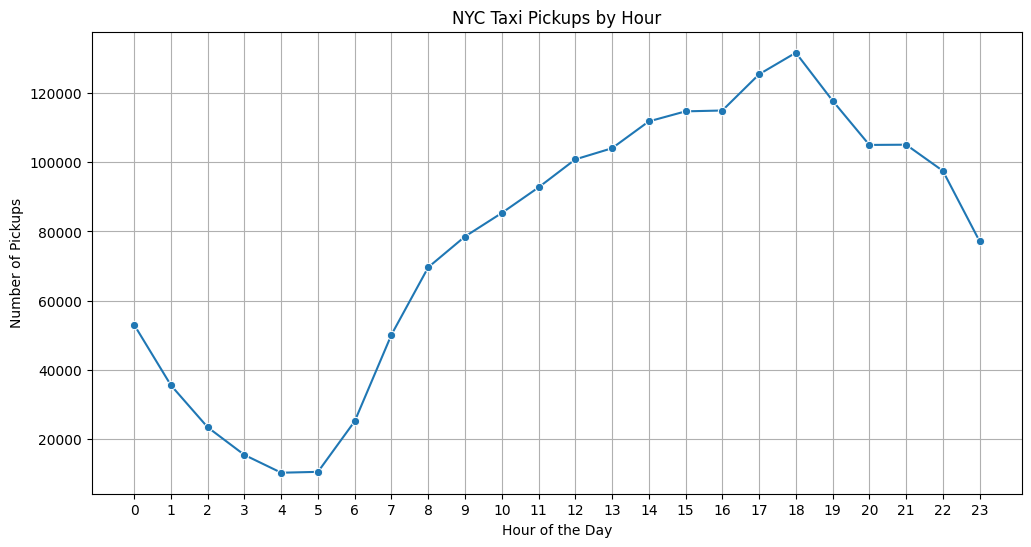

In [47]:
# Find and show the hourly trends in taxi pickups

# Count pickups per hour
hourly_pickups = df["pickup_hour"].value_counts().sort_index()

# hourly trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_pickups.index, y=hourly_pickups.values, marker="o")
plt.xticks(range(0, 24))
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("NYC Taxi Pickups by Hour")
plt.grid()
plt.show()

# Anlysis: maximum pickup is at 6pm and least pick is at mid night.


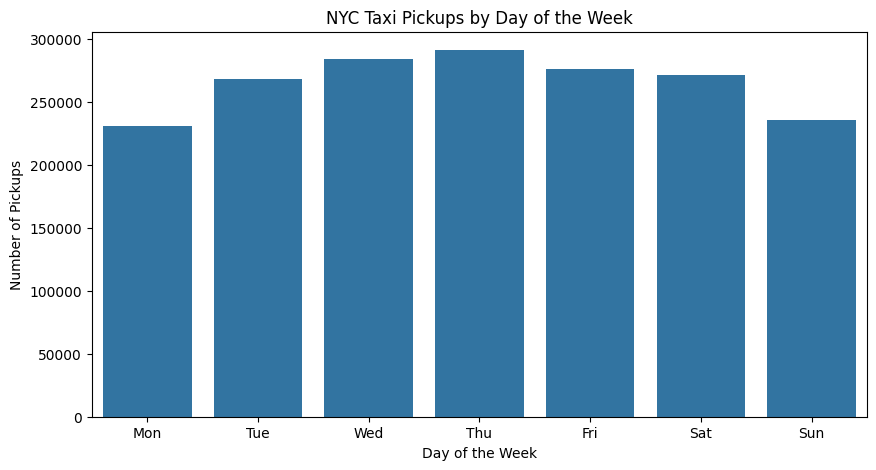

In [48]:
# Find and show the daily trends in taxi pickups (days of the week)

df["day_of_week"] = df["tpep_pickup_datetime"].dt.dayofweek

# Count pickups per day
weekly_pickups = df["day_of_week"].value_counts().sort_index()

# Plot daily trend
plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_pickups.index, y=weekly_pickups.values)
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("NYC Taxi Pickups by Day of the Week")
plt.show()

# Trend shows that Thursday has the maximum number of pickups

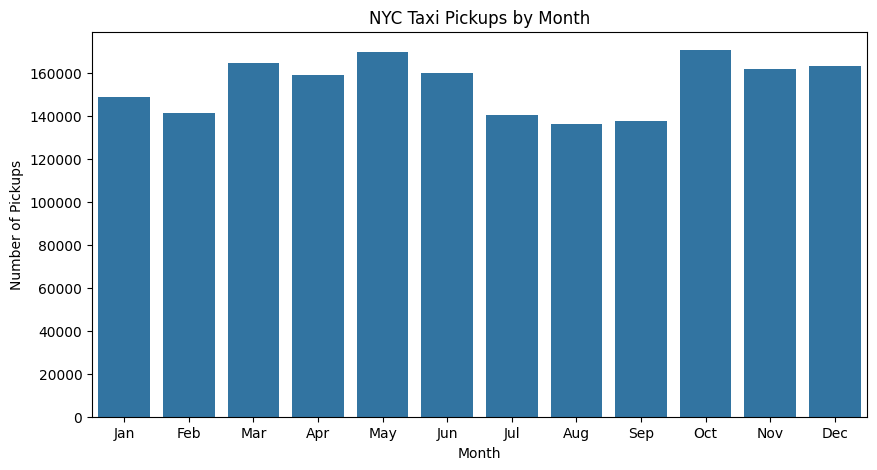

In [49]:
# Show the monthly trends in pickups

df["month"] = df["tpep_pickup_datetime"].dt.month

# Count pickups per month
monthly_pickups = df["month"].value_counts().sort_index()

# Plot monthly trend
plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values)
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("NYC Taxi Pickups by Month")
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [57]:
# Analyse the above parameters

(df['fare_amount'] == 0).sum()  # 531
(df['tip_amount'] == 0).sum()  # 417141
(df['total_amount'] == 0).sum()  # 305
(df['trip_distance'] == 0).sum()  # 35616

35616

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?
Answer :  It may be beneficial to create a copy DataFrame leaving out the zero values from these but depends on which variable to filter out. Like Tip_Amount with 0 value can be valid as many passengers do not tip however total_amount with 0 value where trip_distance is as well 0 can be removed.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?
Answer: If pickup and dropoff locations are different, these can be invalid case and can be removed. If pickup and dropoff are in the same zone, then these can be valid and hence I think we should keep the rows.

In [59]:
# Create a df with non zero entries for the selected parameters.

df_nonZero = df[(df["fare_amount"] != 0) & (df["tip_amount"] != 0) & (df["total_amount"] != 0) & (df["trip_distance"] != 0)]
df_nonZero.shape[0]

1429590

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

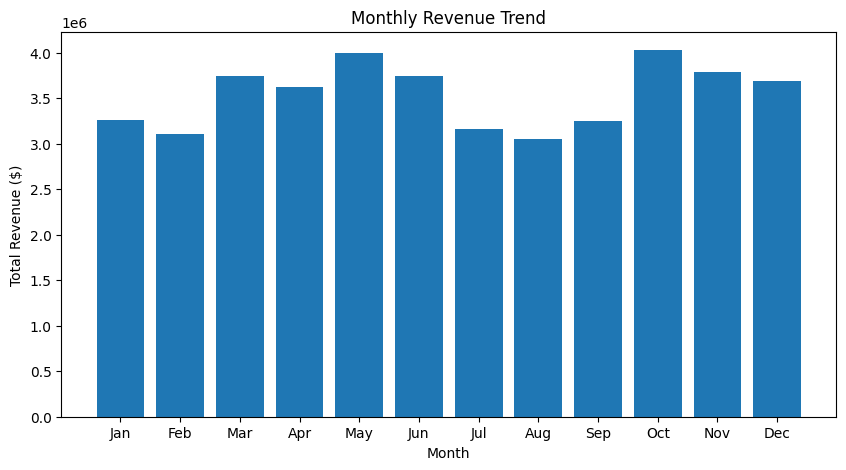

In [63]:
# Group data by month and analyse monthly revenue
df_nonZero["month"] = df_nonZero["tpep_pickup_datetime"].dt.month
monthly_revenue = df_nonZero.groupby("month")["total_amount"].sum().reset_index()

plt.figure(figsize=(10,5))
plt.bar(monthly_revenue["month"], monthly_revenue["total_amount"])

plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Revenue Trend")
plt.xticks(ticks=range(1,13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.show()

# As per this analysis, it seemms May and Oct month had max and almost same revenue.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

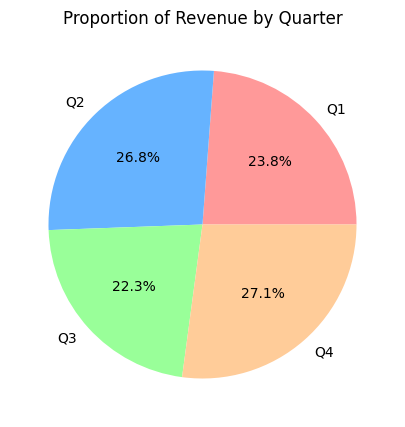

In [71]:
# Calculate proportion of each quarter

df_nonZero["quarter"] = df_nonZero["tpep_pickup_datetime"].dt.quarter
quarterly_revenue = df_nonZero.groupby("quarter")["total_amount"].sum().reset_index()
quarterly_revenue["proportion"] = (quarterly_revenue["total_amount"] / quarterly_revenue["total_amount"].sum()) * 100

plt.figure(figsize=(7,5))
plt.pie(quarterly_revenue["proportion"], labels=["Q1", "Q2", "Q3", "Q4"], autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])

plt.title("Proportion of Revenue by Quarter")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

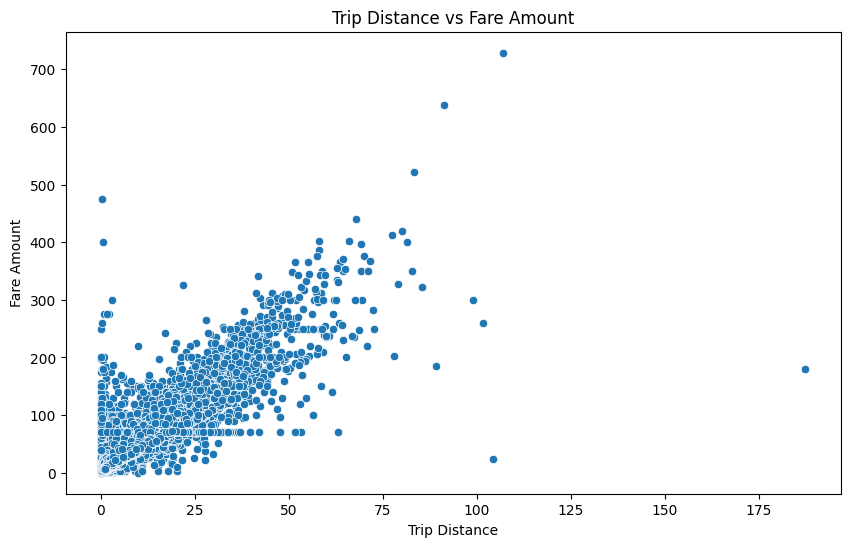

Correlation between Trip Distance and Fare Amount: 0.948999868838561


In [76]:
# Show how trip fare is affected by distance

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_nonZero["trip_distance"], y=df_nonZero["fare_amount"])
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Trip Distance vs Fare Amount")
plt.show()

correlation = df_nonZero["trip_distance"].corr(df_nonZero["fare_amount"])
print(f"Correlation between Trip Distance and Fare Amount: {correlation}")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

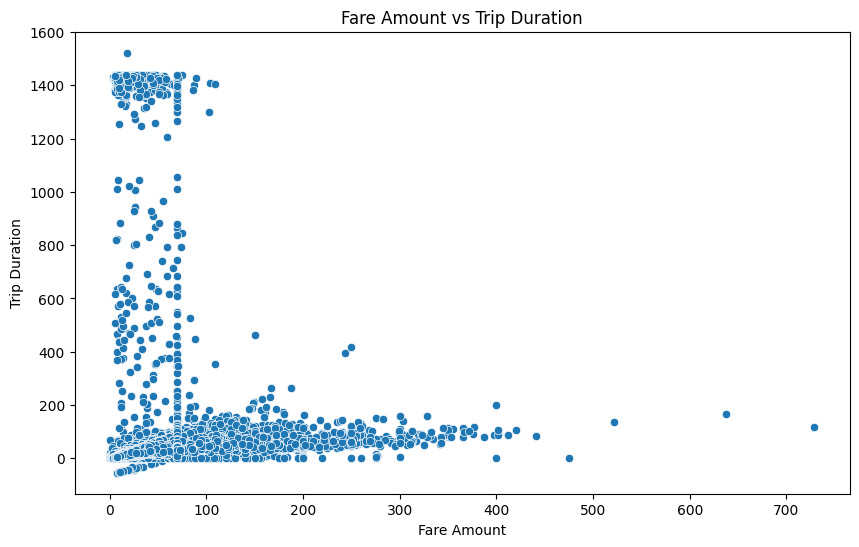

Correlation between Fare Amount and Trip Duration: 0.3304347132209424


In [78]:
# Show relationship between fare and trip duration

df_nonZero["tpep_pickup_datetime"] = pd.to_datetime(df_nonZero["tpep_pickup_datetime"])
df_nonZero["tpep_dropoff_datetime"] = pd.to_datetime(df_nonZero["tpep_dropoff_datetime"])

df_nonZero["trip_duration"] = (df_nonZero["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]).dt.total_seconds() / 60

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_nonZero["fare_amount"], y=df_nonZero["trip_duration"])
plt.xlabel("Fare Amount")
plt.ylabel("Trip Duration")
plt.title("Fare Amount vs Trip Duration")
plt.show()

correlation = df_nonZero["fare_amount"].corr(df_nonZero["trip_duration"])
print(f"Correlation between Fare Amount and Trip Duration: {correlation}")

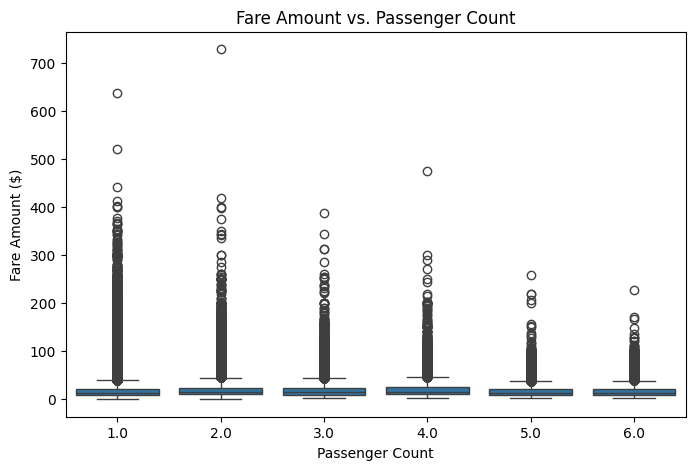

passenger_count  fare_amount
passenger_count         1.000000     0.035279
fare_amount             0.035279     1.000000

In [84]:
# Show relationship between fare and number of passengers

plt.figure(figsize=(8,5))
sns.boxplot(x=df_nonZero["passenger_count"], y=df_nonZero["fare_amount"])
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs. Passenger Count")
plt.show()

df_nonZero[["passenger_count", "fare_amount"]].corr()


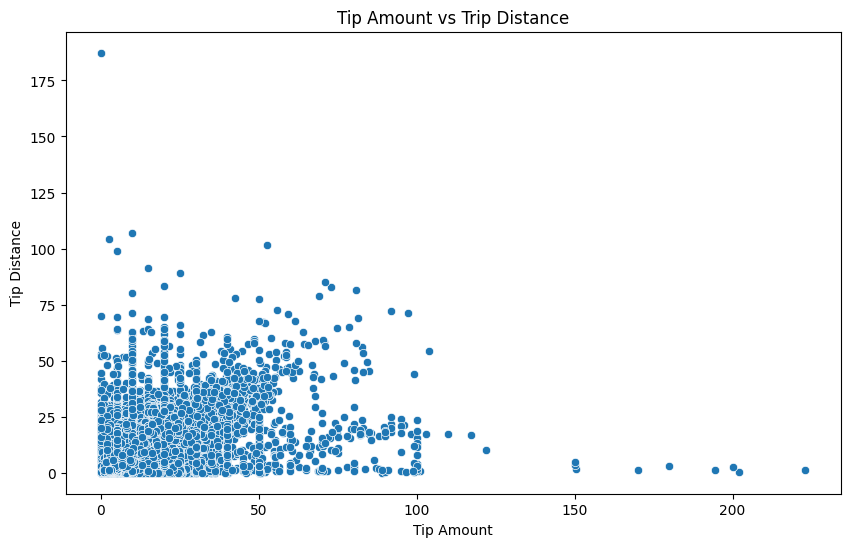

Correlation between Tip Amount and Trip Distance: 0.7989617569451064


In [82]:
# Show relationship between tip and trip distance

plt.figure(figsize=(10,6))
sns.scatterplot(x=df_nonZero["tip_amount"], y=df_nonZero["trip_distance"])
plt.xlabel("Tip Amount")
plt.ylabel("Tip Distance")
plt.title("Tip Amount vs Trip Distance")
plt.show()

correlation = df_nonZero["tip_amount"].corr(df_nonZero["trip_distance"])
print(f"Correlation between Tip Amount and Trip Distance: {correlation}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

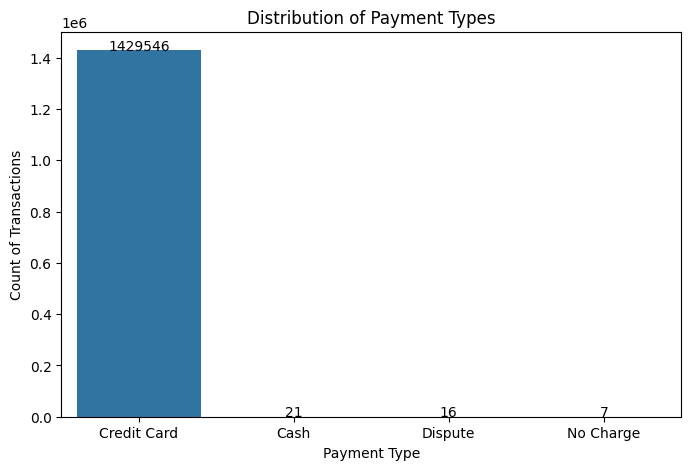

In [105]:
# Analyse the distribution of different payment types (payment_type).

# mapping for payment type labels
payment_labels = {1: "Credit Card", 2: "Cash", 3: "No Charge", 4: "Dispute"}

payment_counts = df_nonZero["payment_type"].value_counts()

# Replace numeric values with text labels
payment_counts.index = payment_counts.index.map(payment_labels)


plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values)

for index, value in enumerate(payment_counts.values):
    plt.text(index, value + 100, str(value), ha="center", fontsize=10)

plt.xlabel("Payment Type")
plt.ylabel("Count of Transactions")
plt.title("Distribution of Payment Types")

plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [106]:
# !pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ------------------ --------------------- 7.3/16.2 MB 34.9 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 37.4 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 37.4 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 37.4 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 15.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -------------------------------------- - 6.0/6.3 MB 46.1 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 22.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 18.8 MB/s eta 0:00:00


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [123]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('../Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

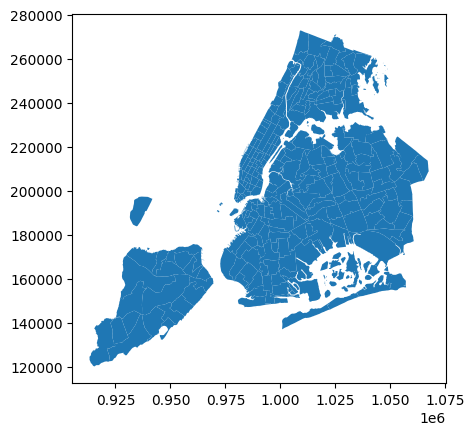

In [124]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [125]:
# Merge zones and trip records using locationID and PULocationID

trip_data = df_nonZero.merge(zones, how="left", left_on="PULocationID", right_on="LocationID", suffixes=("", "_zones"))
trip_data.shape[0]

1429620

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [126]:
# Group data by location and calculate the number of trips

trip_counts = df_nonZero.groupby("PULocationID")["PULocationID"].count().reset_index(name="total_trips")
total_trips = df_nonZero.shape[0]
trip_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PULocationID  235 non-null    int64
 1   total_trips   235 non-null    int64
dtypes: int64(2)
memory usage: 3.8 KB


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [127]:
# Merge trip counts back to the zones GeoDataFrame

zones = zones.merge(trip_counts, how="left", left_on="LocationID", right_on="PULocationID")
print(zones.columns)

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry', 'PULocationID', 'total_trips'],
      dtype='object')


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

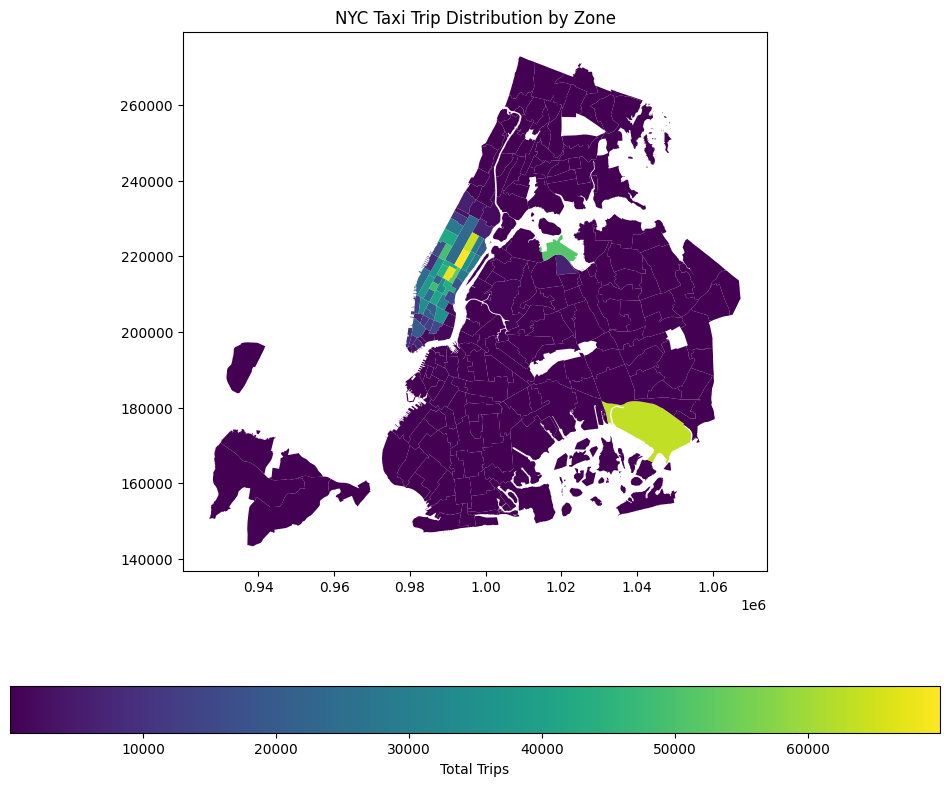

In [128]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it

zones.plot(
    column="total_trips", 
    ax = ax,
    legend=True,  
    legend_kwds={"label": "Total Trips", "orientation": "horizontal"}
)

plt.title("NYC Taxi Trip Distribution by Zone")
plt.show()

In [129]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones.sort_values(by="total_trips", ascending=False)
print(zones_sorted[["zone", "total_trips"]].head(10))

                             zone  total_trips
236         Upper East Side South      69957.0
160                Midtown Center      67633.0
235         Upper East Side North      64138.0
131                   JFK Airport      63254.0
161                  Midtown East      52624.0
137             LaGuardia Airport      51342.0
141           Lincoln Square East      49213.0
185  Penn Station/Madison Sq West      48330.0
229     Times Sq/Theatre District      44544.0
169                   Murray Hill      43337.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [138]:
# Find routes which have the slowest speeds at different times of the day

# Trip duration in hours
df_nonZero["trip_duration_hours"] = (df_nonZero["tpep_dropoff_datetime"] - df_nonZero["tpep_pickup_datetime"]).dt.total_seconds() / 3600

# There are total 32 negative trip duration, which shows drop off before pickup, excluding these values
df_nonZero = df_nonZero[df_nonZero["trip_duration_hours"] > 0]

# Pickup hour
df_nonZero["pickup_hour"] = df_nonZero["tpep_pickup_datetime"].dt.hour

# Average trip duration
average_trip_duration = df_nonZero.groupby(["PULocationID", "DOLocationID", "pickup_hour"])["trip_duration_hours"].mean().reset_index()

# Average trip distance for each route
route_distances = df_nonZero.groupby(["PULocationID", "DOLocationID"])["trip_distance"].mean().reset_index()

# merging Average trip duration data with Average distance for every route
route_speed_data = average_trip_duration.merge(route_distances, on=["PULocationID", "DOLocationID"])

route_speed_data.info()

route_speed_data["speed"] = route_speed_data["trip_distance"] / route_speed_data["trip_duration_hours"]

slowest_routes = route_speed_data.sort_values(by="speed", ascending=True)
slowest_routes.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107504 entries, 0 to 107503
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   PULocationID         107504 non-null  int64  
 1   DOLocationID         107504 non-null  int64  
 2   pickup_hour          107504 non-null  int32  
 3   trip_duration_hours  107504 non-null  float64
 4   trip_distance        107504 non-null  float64
dtypes: float64(2), int32(1), int64(2)
memory usage: 3.7 MB


PULocationID  DOLocationID  pickup_hour  trip_duration_hours  \
96738           243           264           17            23.159167   
63715           162           162            4            23.772778   
93191           237           238            4            23.675833   
70471           170           125            2            23.333056   
57232           151            24            1             6.025972   
9881             48           184            1             1.094444   
2517             13           209            7            11.829028   
25586            90           209           11            23.799167   
74902           195            50           17             0.816667   
31185           113            66           12            23.809722   

       trip_distance     speed  
96738       0.180000  0.007772  
63715       0.709090  0.029828  
93191       2.240893  0.094649  
70471       2.805492  0.120237  
57232       0.750452  0.124536  
9881        0.140000  0.127919  
2517        1.529596  0.129309  
25586       3.127963  0.131432  
74902       0.110000  0.134694  
31185       3.337813  0.140187

How does identifying high-traffic, high-demand routes help us?

Answer: Identifying high-traffic, high-demand routes in taxi services offers several advantages for drivers, customers, and taxi companies.
Taxi companies can allocate more vehicles to busy routes to reduce wait times for passengers.
Helps in dispatching taxis efficiently to high-demand areas, minimizing idle time.
Drivers can focus on high-demand areas, increasing their chances of getting back-to-back rides.
Shorter wait times for customers in high-demand areas.
Identifying bottlenecks helps in suggesting alternate routes to avoid traffic jams.
Can be used to adjust pricing strategies, encouraging rides during off-peak hours to distribute demand more evenly.
Companies can use this data to adjust fares dynamically based on demand.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest Hour: 18, Number of Trips: 104216


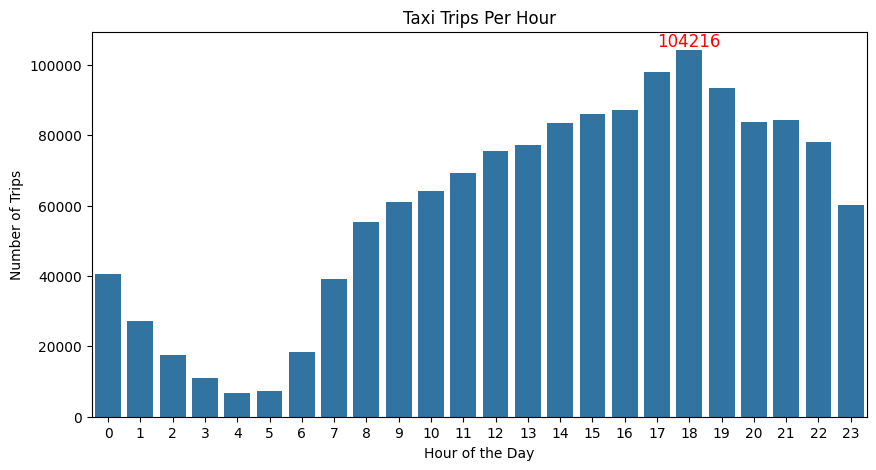

In [146]:
# Visualise the number of trips per hour and find the busiest hour
sampling_ratio = 0.05
hourly_trips = (df_nonZero.groupby("pickup_hour")["pickup_hour"].count().reset_index(name="trip_count_hour"))

busiest_hour = hourly_trips.loc[hourly_trips["trip_count_hour"].idxmax(), "pickup_hour"]
busiest_hour_count = hourly_trips["trip_count_hour"].max()

print(f"Busiest Hour: {busiest_hour}, Number of Trips: {busiest_hour_count}")

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trips["pickup_hour"], y=hourly_trips["trip_count_hour"])

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips Per Hour")
plt.xticks(range(0, 24))  
plt.text(busiest_hour, busiest_hour_count, f"{busiest_hour_count}", ha="center", va="bottom", fontsize=12, color="red")
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [147]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

hourly_trips = (df_nonZero.groupby("pickup_hour")["pickup_hour"].count().reset_index(name="trip_count_hour"))
hourly_trips["scaled_trip_count"] = hourly_trips["trip_count_hour"] / sample_fraction

busiest_hour = hourly_trips.loc[hourly_trips["scaled_trip_count"].idxmax(), "pickup_hour"]
busiest_hour_count = hourly_trips["scaled_trip_count"].max()

print(f"Busiest Hour: {busiest_hour}, Number of Trips: {busiest_hour_count}")


Busiest Hour: 18, Number of Trips: 2084320.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

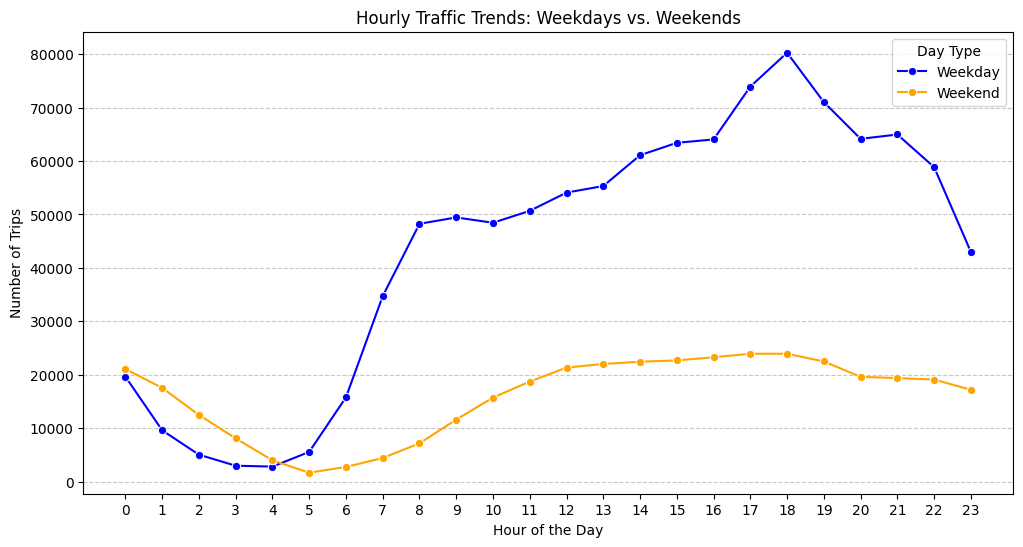

In [148]:
# Compare traffic trends for the week days and weekends
df_nonZero["pickup_day"] = df_nonZero["tpep_pickup_datetime"].dt.dayofweek
df_nonZero["day_type"] = df_nonZero["pickup_day"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

hourly_trips = df_nonZero.groupby(["pickup_hour", "day_type"])["pickup_hour"].count().reset_index(name="trip_count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trips, x="pickup_hour", y="trip_count", hue="day_type", marker="o", palette={"Weekday": "blue", "Weekend": "orange"})

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Traffic Trends: Weekdays vs. Weekends")
plt.xticks(range(0, 24))
plt.legend(title="Day Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Answer: on Weekdays, 5am is the quitest hour and arround 5-6pm is the busiest time. At the same time on weekend 4am is the quitest hour and 6pm is the busiest time.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

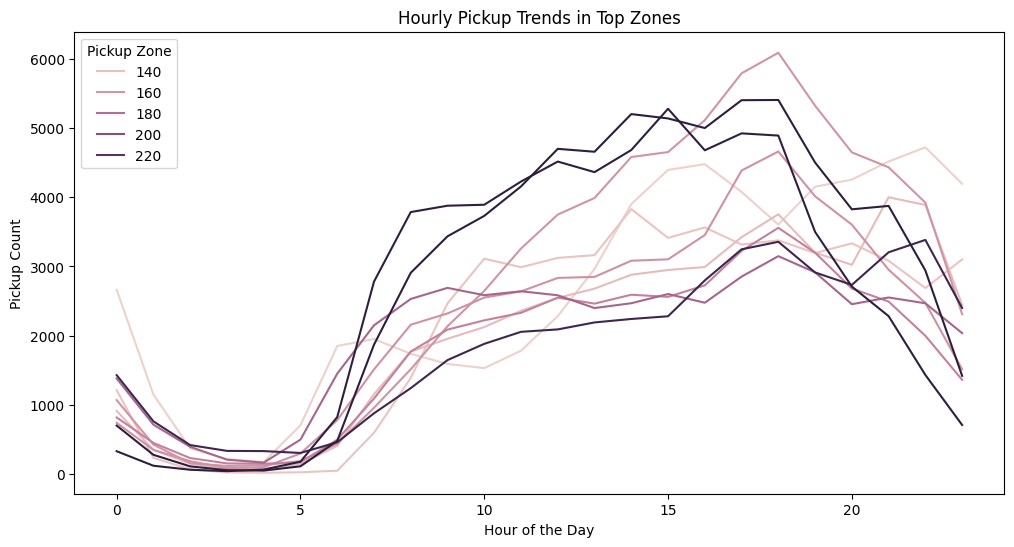

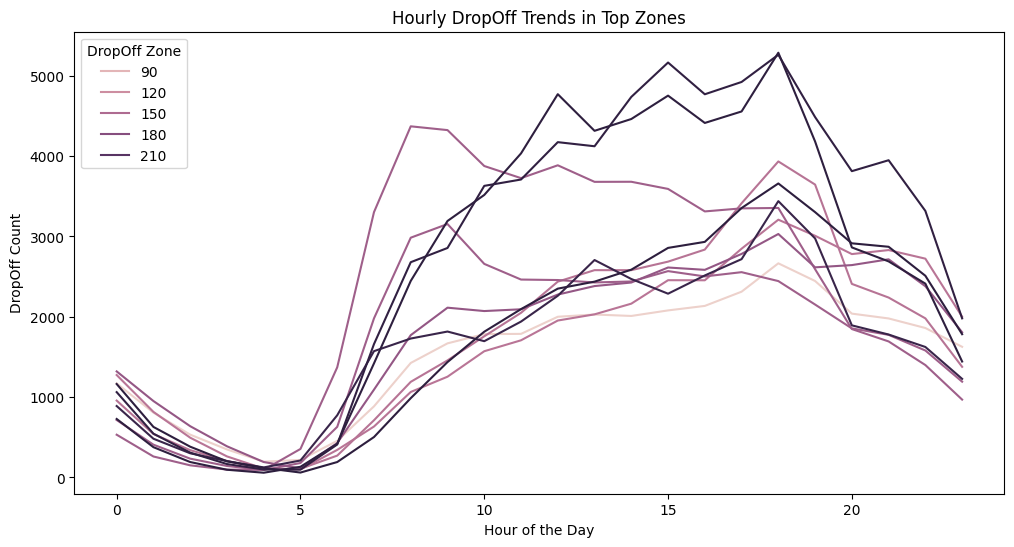

     PULocationID  pickup_count
207           237         69955
140           161         67633
206           236         64138
112           132         63254
141           162         52621
118           138         51341
122           142         49213
162           186         48328
200           230         44544
149           170         43336
     DOLocationID  dropoff_count
228           236          67911
229           237          62750
154           161          55807
163           170          43424
231           239          43137
135           142          41810
155           162          41588
134           141          40081
222           230          39630
66             68          36459


In [206]:
# Find top 10 pickup and dropoff zones
top_pickup_zones = df_nonZero.groupby("PULocationID")["PULocationID"].count().reset_index(name="pickup_count")
top_pickup_zones = top_pickup_zones.sort_values(by="pickup_count", ascending=False).head(10)

top_dropoff_zones = df_nonZero.groupby("DOLocationID")["DOLocationID"].count().reset_index(name="dropoff_count")
top_dropoff_zones = top_dropoff_zones.sort_values(by="dropoff_count", ascending=False).head(10)

# Pickup trends:

hourly_pickups = df_nonZero[df_nonZero["PULocationID"].isin(top_pickup_zones["PULocationID"])]
hourly_pickups = hourly_pickups.groupby(["pickup_hour", "PULocationID"]).size().reset_index(name="hourly_pickups")

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_pickups, x="pickup_hour", y="hourly_pickups", hue="PULocationID")
plt.xlabel("Hour of the Day")
plt.ylabel("Pickup Count")
plt.title("Hourly Pickup Trends in Top Zones")
plt.legend(title="Pickup Zone")
plt.show()


# Dropoff Trends

df_nonZero["dropoff_hour"] = df_nonZero["tpep_dropoff_datetime"].dt.hour
hourly_dropoff = df_nonZero[df_nonZero["DOLocationID"].isin(top_dropoff_zones["DOLocationID"])]
hourly_dropoff = hourly_dropoff.groupby(["dropoff_hour", "DOLocationID"]).size().reset_index(name="hourly_dropoff")

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_dropoff, x="dropoff_hour", y="hourly_dropoff", hue="DOLocationID")
plt.xlabel("Hour of the Day")
plt.ylabel("DropOff Count")
plt.title("Hourly DropOff Trends in Top Zones")
plt.legend(title="DropOff Zone")
plt.show()

print(top_pickup_zones)
print(top_dropoff_zones)



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [160]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts_ratio = df_nonZero.groupby("PULocationID").size().reset_index(name="pickup_counts_r")
dropoff_counts_ratio = df_nonZero.groupby("DOLocationID").size().reset_index(name="dropoff_counts_r")

# Merging the two dataframes
zone_trips = pickup_counts_ratio.merge(dropoff_counts_ratio, left_on="PULocationID", right_on="DOLocationID", how="outer")

# calculate pickup_drop_ratio
zone_trips["pickup_drop_ratio"] = zone_trips["pickup_counts_r"] / (zone_trips["dropoff_counts_r"]) 

# Find top and bottom 10 zones
top_10_zones = zone_trips.nlargest(10, "pickup_drop_ratio")
bottom_10_zones = zone_trips.nsmallest(10, "pickup_drop_ratio")

# Print the results
print("Top 10 Zones with Highest Pickup/Dropoff Ratios")
print(top_10_zones)

print("\nBottom 10 Zones with Lowest Pickup/Dropoff Ratios")
print(bottom_10_zones)

Top 10 Zones with Highest Pickup/Dropoff Ratios
     PULocationID  pickup_counts_r  DOLocationID  dropoff_counts_r  \
69           70.0           6386.0          70.0             478.0   
126         132.0          63254.0         132.0           14883.0   
132         138.0          51341.0         138.0           19863.0   
201         207.0             12.0         207.0               6.0   
180         186.0          48328.0         186.0           29618.0   
108         114.0          20061.0         114.0           14446.0   
42           43.0          23814.0          43.0           17267.0   
243         249.0          34170.0         249.0           25603.0   
156         162.0          52621.0         162.0           41588.0   
98          100.0          21442.0         100.0           17525.0   

     pickup_drop_ratio  
69           13.359833  
126           4.250084  
132           2.584756  
201           2.000000  
180           1.631710  
108           1.388689  
42    

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [161]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_trips = df_nonZero[(df_nonZero["pickup_hour"] >= 23) | (df_nonZero["pickup_hour"] <= 5)]

night_pickups = night_trips.groupby("PULocationID").size().reset_index(name="night_pickup_count")
night_dropoffs = night_trips.groupby("DOLocationID").size().reset_index(name="night_dropoff_count")

top_night_pickups = night_pickups.nlargest(10, "night_pickup_count")
top_night_dropoffs = night_dropoffs.nlargest(10, "night_dropoff_count")

print("Top 10 Pickup Zones at Night:")
print(top_night_pickups)

print("\nTop 10 Dropoff Zones at Night:")
print(top_night_dropoffs)


Top 10 Pickup Zones at Night:
     PULocationID  night_pickup_count
50             79               13040
176           249               10625
83            132                9456
28             48                8180
97            148                8174
70            114                7381
161           230                5959
125           186                5373
111           164                4867
40             68                4778

Top 10 Dropoff Zones at Night:
     DOLocationID  night_dropoff_count
77             79                 6815
46             48                 5199
163           170                 5060
101           107                 4867
134           141                 4587
66             68                 4564
254           263                 4363
240           249                 4144
230           239                 3850
227           236                 3761


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [162]:
# Filter for night hours (11 PM to 5 AM)
night_hours = (df_nonZero["pickup_hour"] >= 23) | (df_nonZero["pickup_hour"] <= 5)
# Filter for night hours (11 PM to 5 AM)
day_hours = (df_nonZero["pickup_hour"] > 5) & (df_nonZero["pickup_hour"] < 23)

# revenue
night_revenue = df_nonZero[night_hours]["total_amount"].sum()
day_revenue = df_nonZero[day_hours]["total_amount"].sum()

# Total revenue
total_revenue = night_revenue + day_revenue

# Percentage share
night_revenue_share = (night_revenue / total_revenue) * 100
day_revenue_share = (day_revenue / total_revenue) * 100

# Print results
print(f"Nighttime Revenue Share: {night_revenue_share:.2f}%")
print(f"Daytime Revenue Share: {day_revenue_share:.2f}%")


Nighttime Revenue Share: 12.10%
Daytime Revenue Share: 87.90%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [163]:
# Analyse the fare per mile per passenger for different passenger counts
valid_trips = df_nonZero[(df_nonZero["trip_distance"] > 0) & (df_nonZero["passenger_count"] > 0)]
valid_trips["fare_per_mile_per_passenger"] = valid_trips["fare_amount"] / (valid_trips["trip_distance"] * valid_trips["passenger_count"])

avg_fare_per_mile_per_passenger = valid_trips.groupby("passenger_count")["fare_per_mile_per_passenger"].mean().reset_index()
print(avg_fare_per_mile_per_passenger)

# lesser the passenger the fare per passenger is more. With 5 passengers the total amount paid comes as 7.94 which is lesser than fare with 1 passenger.

   passenger_count  fare_per_mile_per_passenger
0              1.0                     9.261177
1              2.0                     4.991124
2              3.0                     3.328711
3              4.0                     3.933123
4              5.0                     1.589161
5              6.0                     1.284684


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

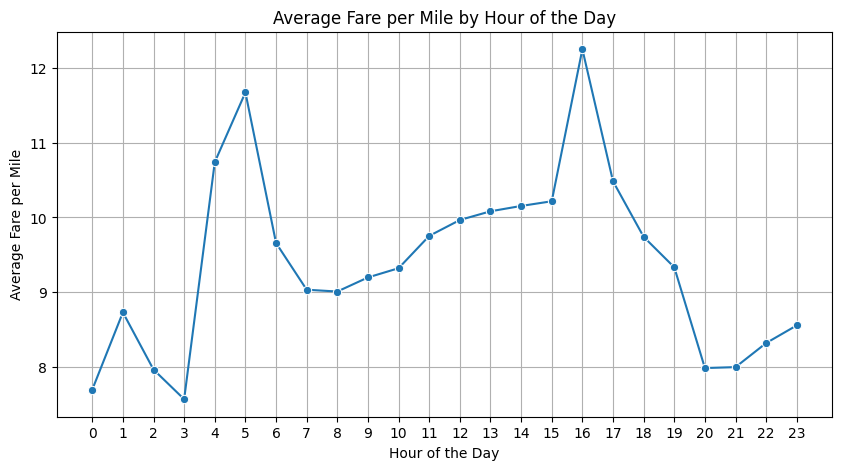

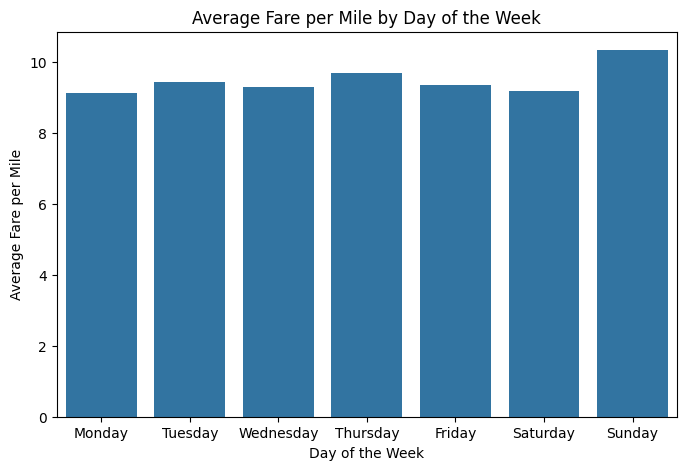

In [167]:
# Compare the average fare per mile for different days and for different times of the day
valid_trips_distance = df_nonZero[df_nonZero["trip_distance"] > 0]
valid_trips_distance["fare_per_mile"] = valid_trips_distance["fare_amount"] / valid_trips_distance["trip_distance"]

hourly_fare_per_mile = valid_trips_distance.groupby("pickup_hour")["fare_per_mile"].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=hourly_fare_per_mile, x="pickup_hour", y="fare_per_mile", marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True)

plt.show()

# df_nonZero.columns

daily_fare_per_mile = valid_trips_distance.groupby("day_of_week")["fare_per_mile"].mean().reset_index()
day_mapping = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
daily_fare_per_mile["day_of_week"] = daily_fare_per_mile["day_of_week"].map(day_mapping)

plt.figure(figsize=(8, 5))
sns.barplot(data=daily_fare_per_mile, x="day_of_week", y="fare_per_mile")

plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile")
plt.title("Average Fare per Mile by Day of the Week")

plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

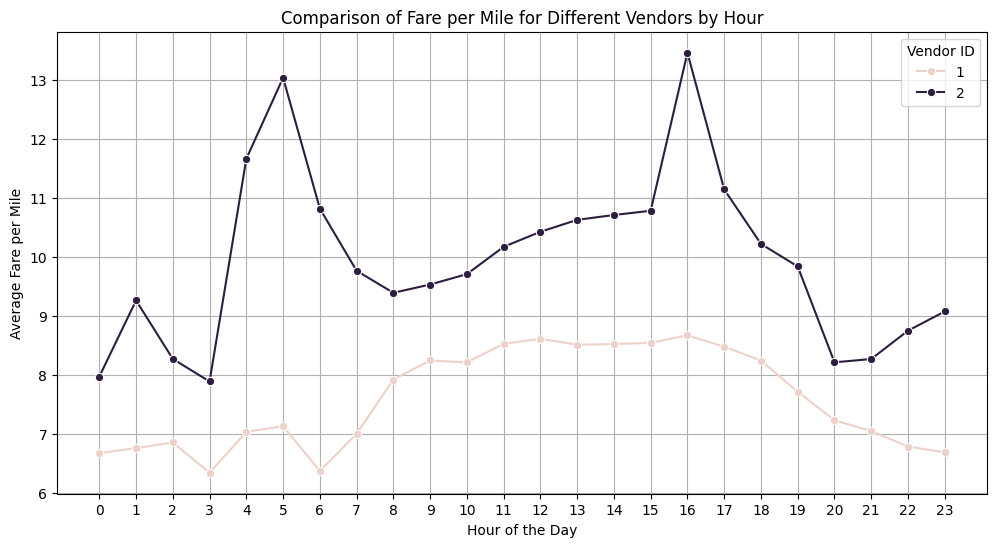

In [168]:
# Compare fare per mile for different vendors

vendor_hourly_fare = valid_trips_distance.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hourly_fare, x="pickup_hour", y="fare_per_mile", hue="VendorID", marker="o")

plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile")
plt.title("Comparison of Fare per Mile for Different Vendors by Hour")
plt.xticks(range(0, 24))
plt.legend(title="Vendor ID")
plt.grid(True)

plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


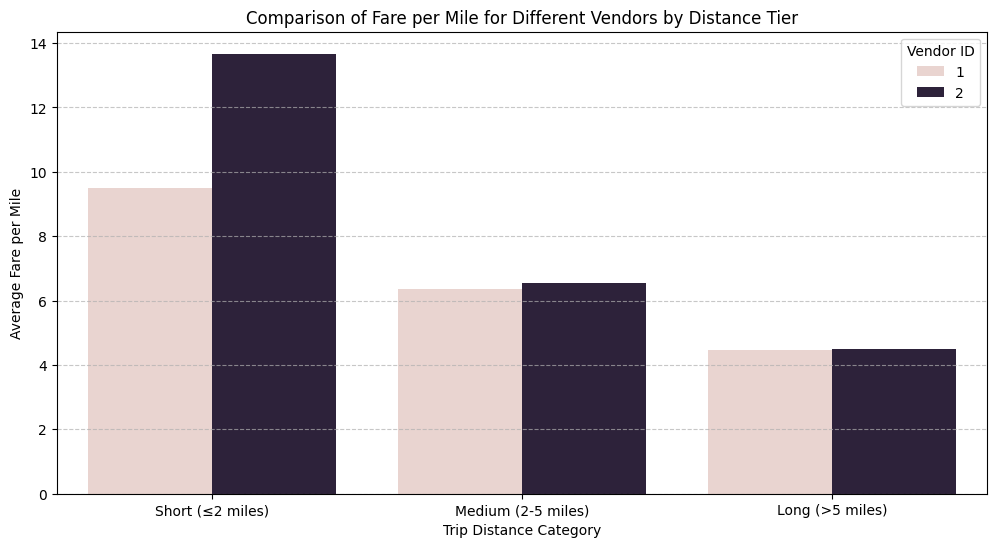

In [170]:
# Defining distance tiers
# Creating distance categories
bins = [0, 2, 5, float("inf")]
labels = ["Short (≤2 miles)", "Medium (2-5 miles)", "Long (>5 miles)"]
valid_trips_distance["distance_category"] = pd.cut(valid_trips_distance["trip_distance"], bins=bins, labels=labels)

vendor_fare_analysis = valid_trips_distance.groupby(["VendorID", "distance_category"])["fare_per_mile"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=vendor_fare_analysis, x="distance_category", y="fare_per_mile", hue="VendorID")

plt.xlabel("Trip Distance Category")
plt.ylabel("Average Fare per Mile")
plt.title("Comparison of Fare per Mile for Different Vendors by Distance Tier")
plt.legend(title="Vendor ID")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

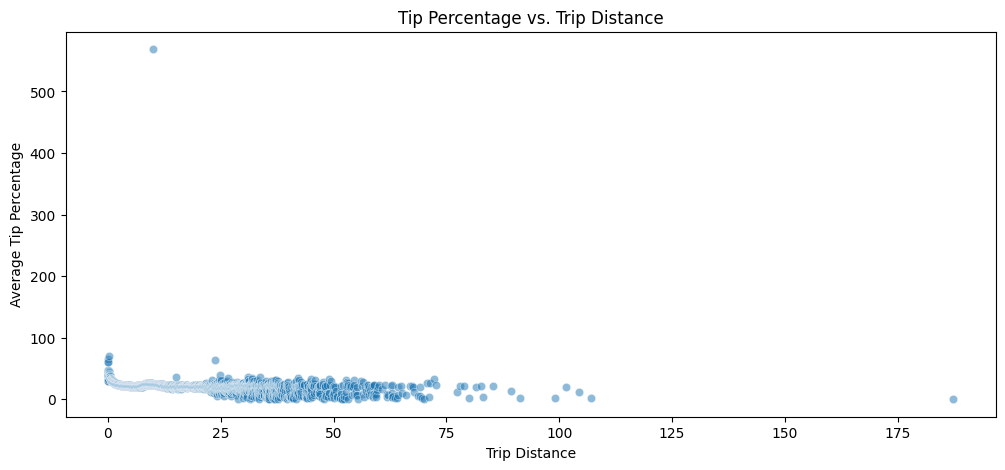

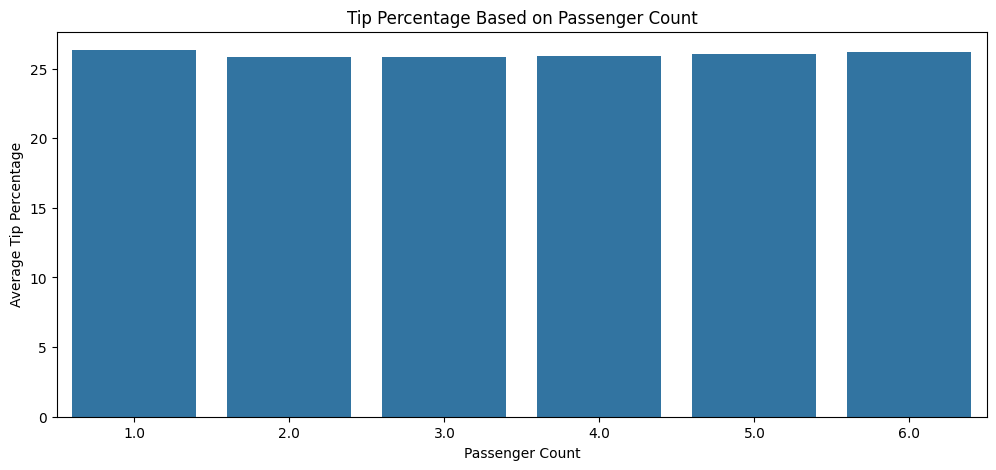

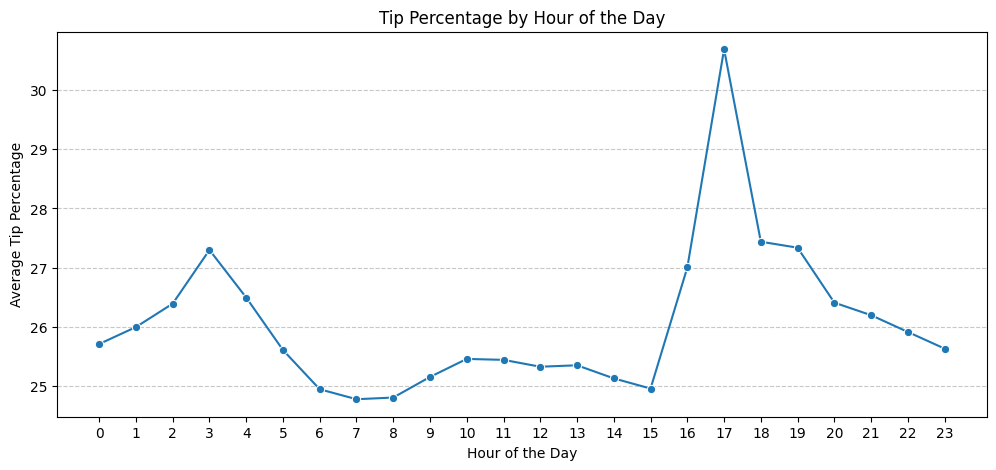

In [171]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_valid_t = df_nonZero[df_nonZero["trip_distance"] > 0]
df_valid_t["tip_percentage"] = (df_valid_t["tip_amount"] / df_valid_t["fare_amount"]) * 100

# Group by trip distance
distance_tips = df_valid_t.groupby("trip_distance")["tip_percentage"].mean().reset_index()

# Group by passenger count
passenger_tips = df_valid_t.groupby("passenger_count")["tip_percentage"].mean().reset_index()

# Group by pickup hour
hourly_tips = df_valid_t.groupby("pickup_hour")["tip_percentage"].mean().reset_index()

# Plot tip percentage by trip distance
plt.figure(figsize=(12, 5))
sns.scatterplot(data=distance_tips, x="trip_distance", y="tip_percentage", alpha=0.5)
plt.xlabel("Trip Distance")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage vs. Trip Distance")
plt.show()

# Plot tip percentage by passenger count
plt.figure(figsize=(12, 5))
sns.barplot(data=passenger_tips, x="passenger_count", y="tip_percentage")
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage Based on Passenger Count")
plt.show()

# Plot tip percentage by pickup hour
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_tips, x="pickup_hour", y="tip_percentage", marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [179]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# df_valid_t.columns
low_tip_trips = df_valid_t[df_valid_t["tip_percentage"] < 10]
high_tip_trips = df_valid_t[df_valid_t["tip_percentage"] > 25]

# Comparing fare amount 
low_tip_trips["fare_amount"].mean(), high_tip_trips["fare_amount"].mean()

# Comparing trip distance
low_tip_trips["trip_distance"].mean(), high_tip_trips["trip_distance"].mean()

# Comparing passenger count
low_tip_trips["passenger_count"].value_counts(normalize=True)
high_tip_trips["passenger_count"].value_counts(normalize=True)

# Comparing payment Type

low_tip_trips["payment_type"].value_counts(normalize=True)
high_tip_trips["payment_type"].value_counts(normalize=True)


payment_type
1    0.999964
2    0.000020
4    0.000014
3    0.000002
Name: proportion, dtype: float64

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

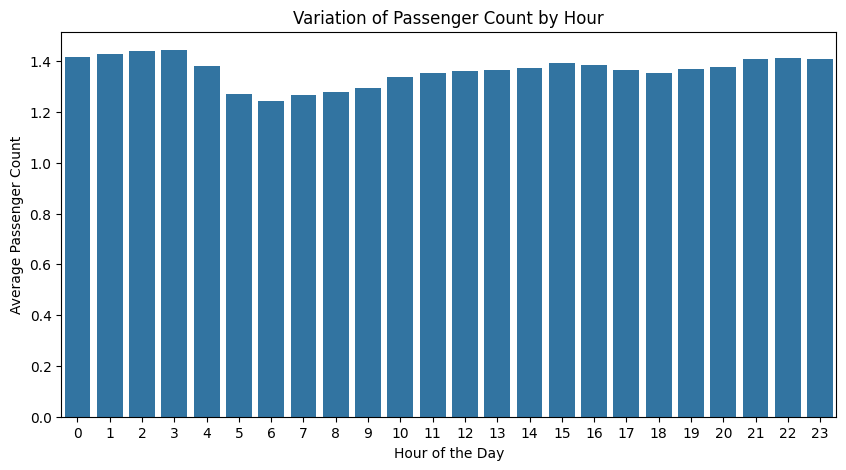

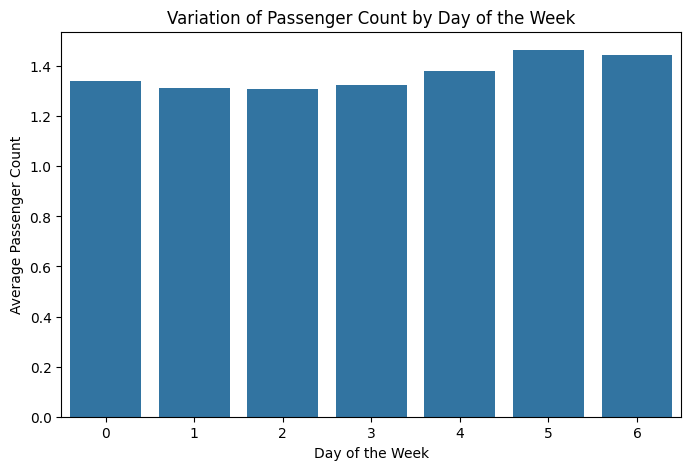

In [182]:
# See how passenger count varies across hours and days

hourly_passenger_count = df_nonZero.groupby("pickup_hour")["passenger_count"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_passenger_count["pickup_hour"], y=hourly_passenger_count["passenger_count"])
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count by Hour")
plt.xticks(range(0, 24))
plt.show()

# passenger count across the days

daily_passenger_count = df_nonZero.groupby("pickup_day")["passenger_count"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=daily_passenger_count["pickup_day"], y=daily_passenger_count["passenger_count"])
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Variation of Passenger Count by Day of the Week")
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

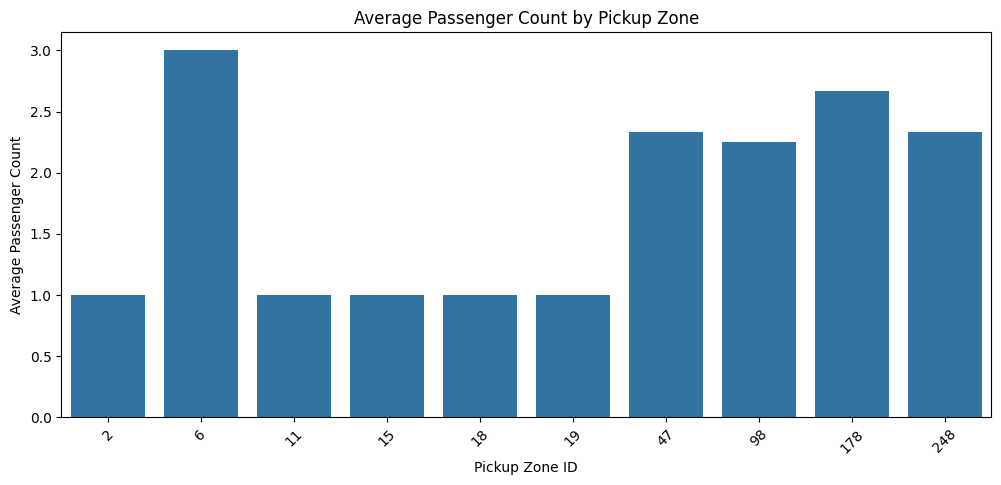

In [197]:
# How does passenger count vary across zones

pickup_zone_passenger = df_nonZero.groupby("PULocationID")["passenger_count"].mean().reset_index()

plt.figure(figsize=(12, 5))
#Getting top 5 and 5 bottoms data to get graph which can be analysed easily
top_5_zones = pickup_zone_passenger.nlargest(5, "passenger_count")
bottom_5_zones = pickup_zone_passenger.nsmallest(5, "passenger_count")
zones_to_plot = pd.concat([top_5_zones, bottom_5_zones])
sns.barplot(x=zones_to_plot["PULocationID"], y=zones_to_plot["passenger_count"])
plt.xlabel("Pickup Zone ID")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Pickup Zone")
plt.xticks(rotation=45)
plt.show()

In [198]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
pickup_zone_passenger.columns
zones.columns

# Merging with the zones GeoDataFrame
zones_with_trips = zones.merge(pickup_zone_passenger, how="left", left_on="LocationID", right_on="PULocationID")
zones_with_trips.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   PULocationID_x  total_trips  PULocationID_y  passenger_count  
0             1.0         37.0             1.0         1.324324  
1             2.0          2.0             2.0         1.000000  
2             NaN          NaN             NaN              NaN  
3             4.0       1670.0             4.0         1.373054  
4             NaN          NaN             NaN              NaN

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [204]:
# How often is each surcharge applied?
df_nonZero[["extra", "mta_tax", "tolls_amount", "improvement_surcharge", "congestion_surcharge", "final_airport_fee"]].describe()

surcharge_counts = df_nonZero[["extra", "mta_tax", "tolls_amount", "improvement_surcharge", "congestion_surcharge", "final_airport_fee"]].gt(0).sum()
surcharge_counts = surcharge_counts.sort_values(ascending=False)

# Displaying frequency of surcharge
print(surcharge_counts)


improvement_surcharge    1429508
mta_tax                  1421152
congestion_surcharge     1358879
extra                     880857
tolls_amount              117609
final_airport_fee         115063
dtype: int64


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.



**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.